In [137]:
# importing required libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt 

In [139]:
#sklearn
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [141]:
#importing the dataset 
df = pd.read_csv("water_potability.csv") 
df 

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [143]:
#rows and columns
x = df.drop(columns=['Potability'], axis=1) 
y = df['Potability']

In [145]:
print(x) 
print(y) 

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013       

In [147]:
#Expolatory Data Analysis 
df.shape 
df.describe() 
df.info() 
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [149]:
#Finding the Null Values 
df.isnull().sum() 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

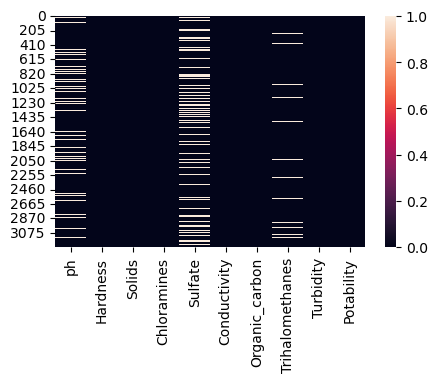

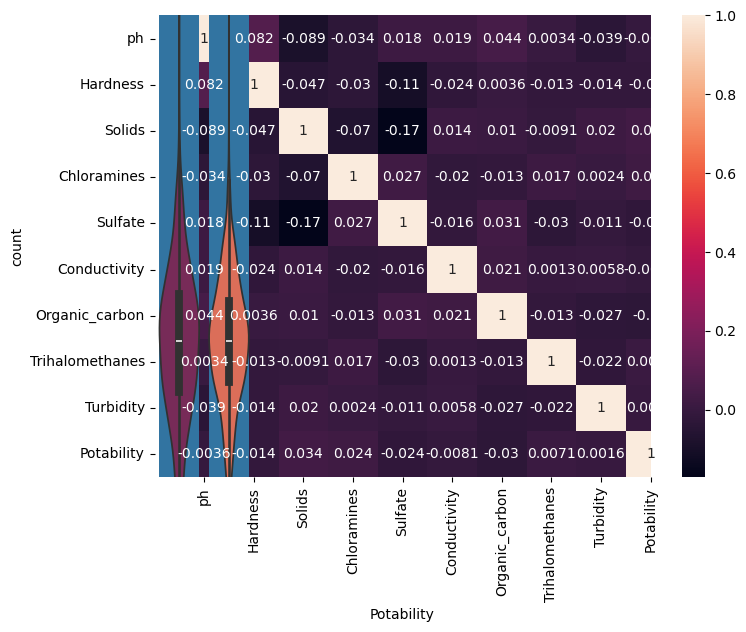

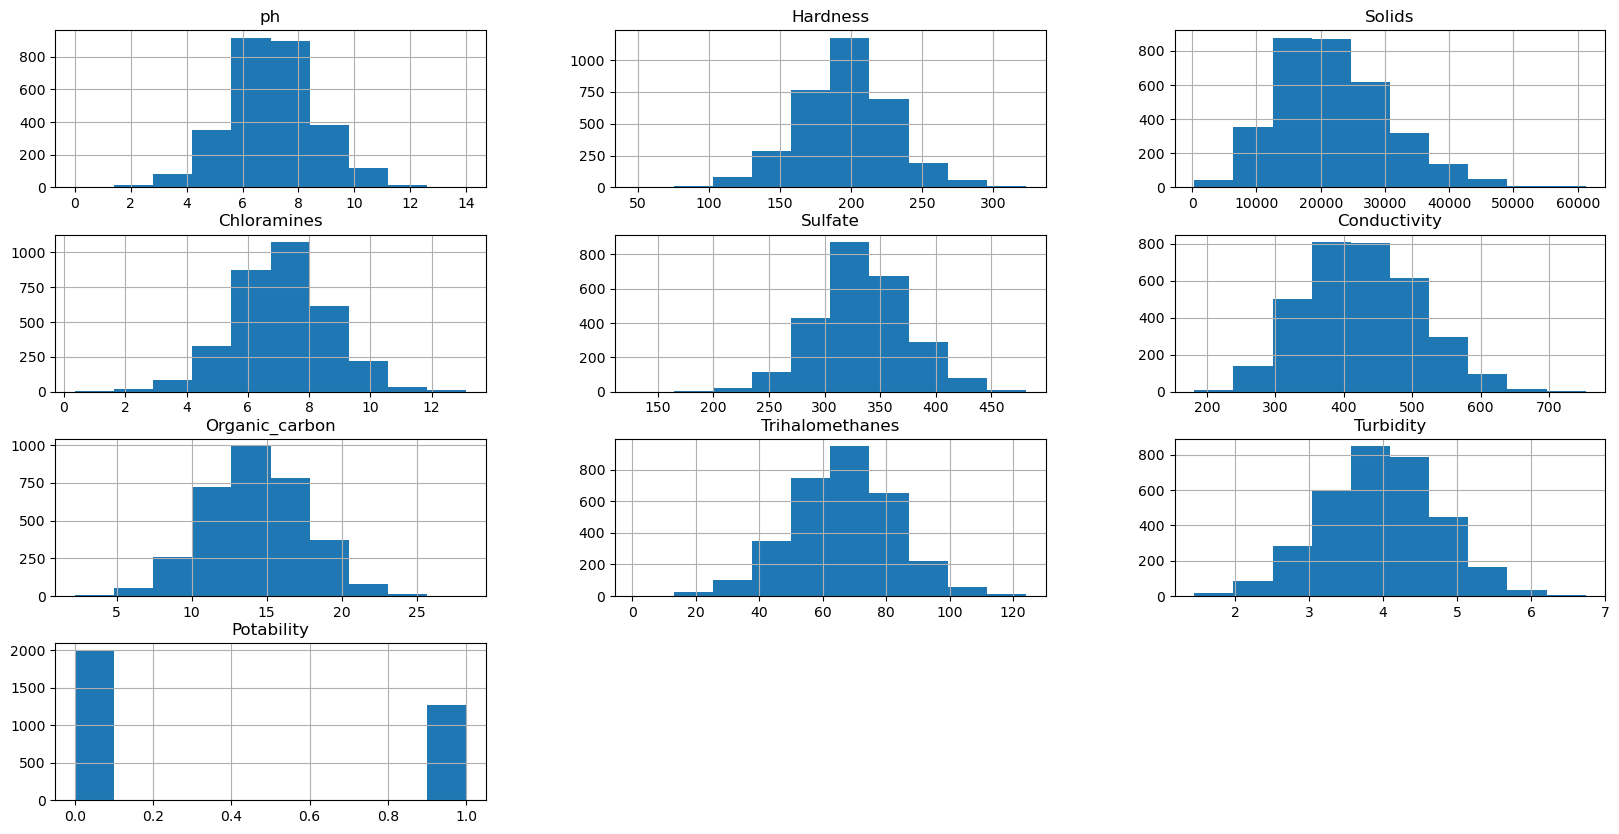

C:\Program Files\KMSpico\temp\ipykernel_13584\3665029560.py:19: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




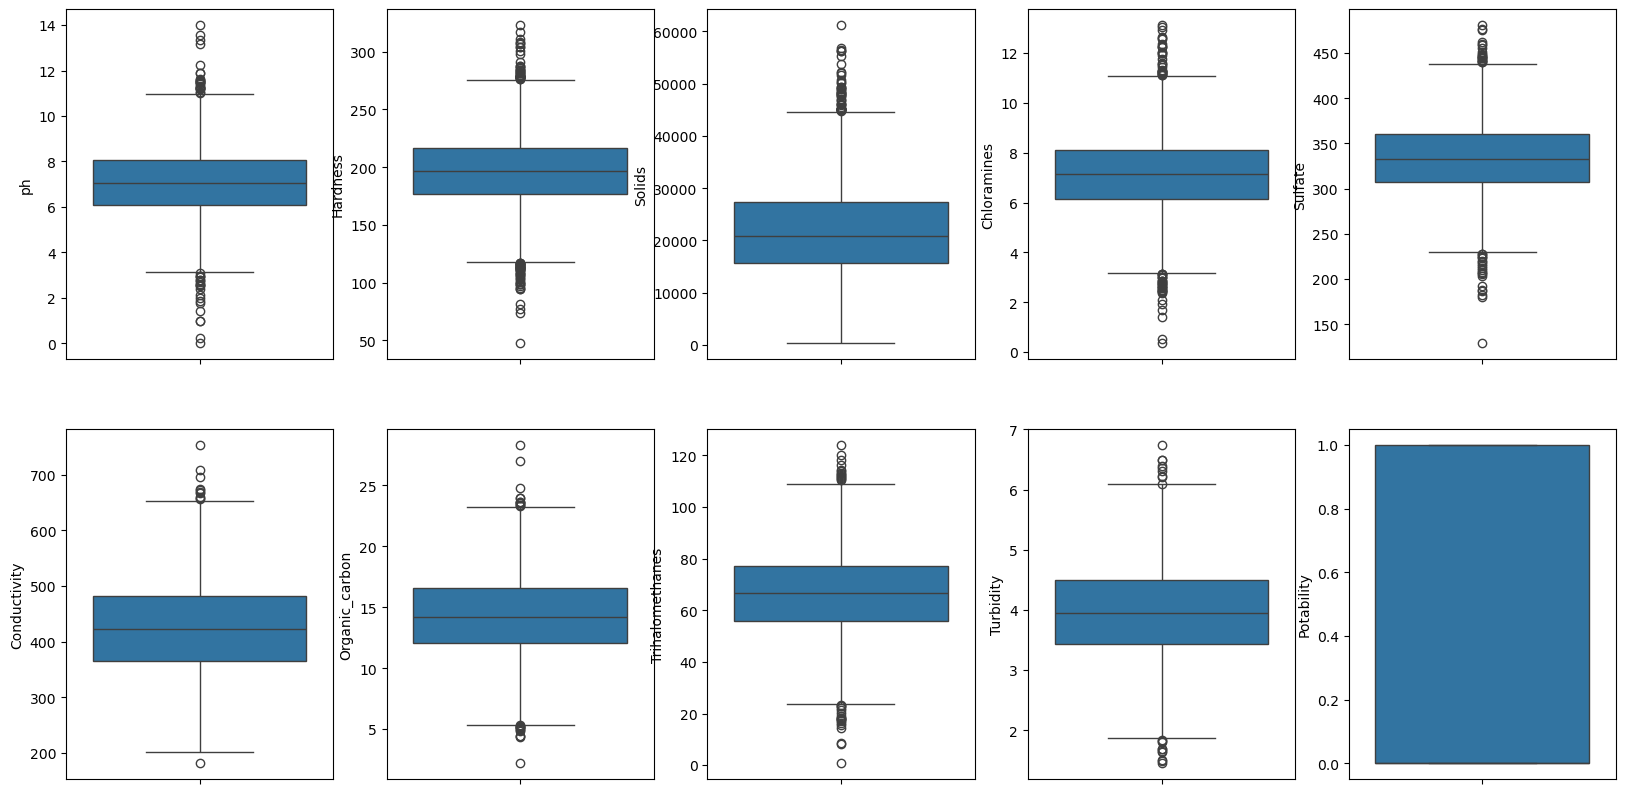

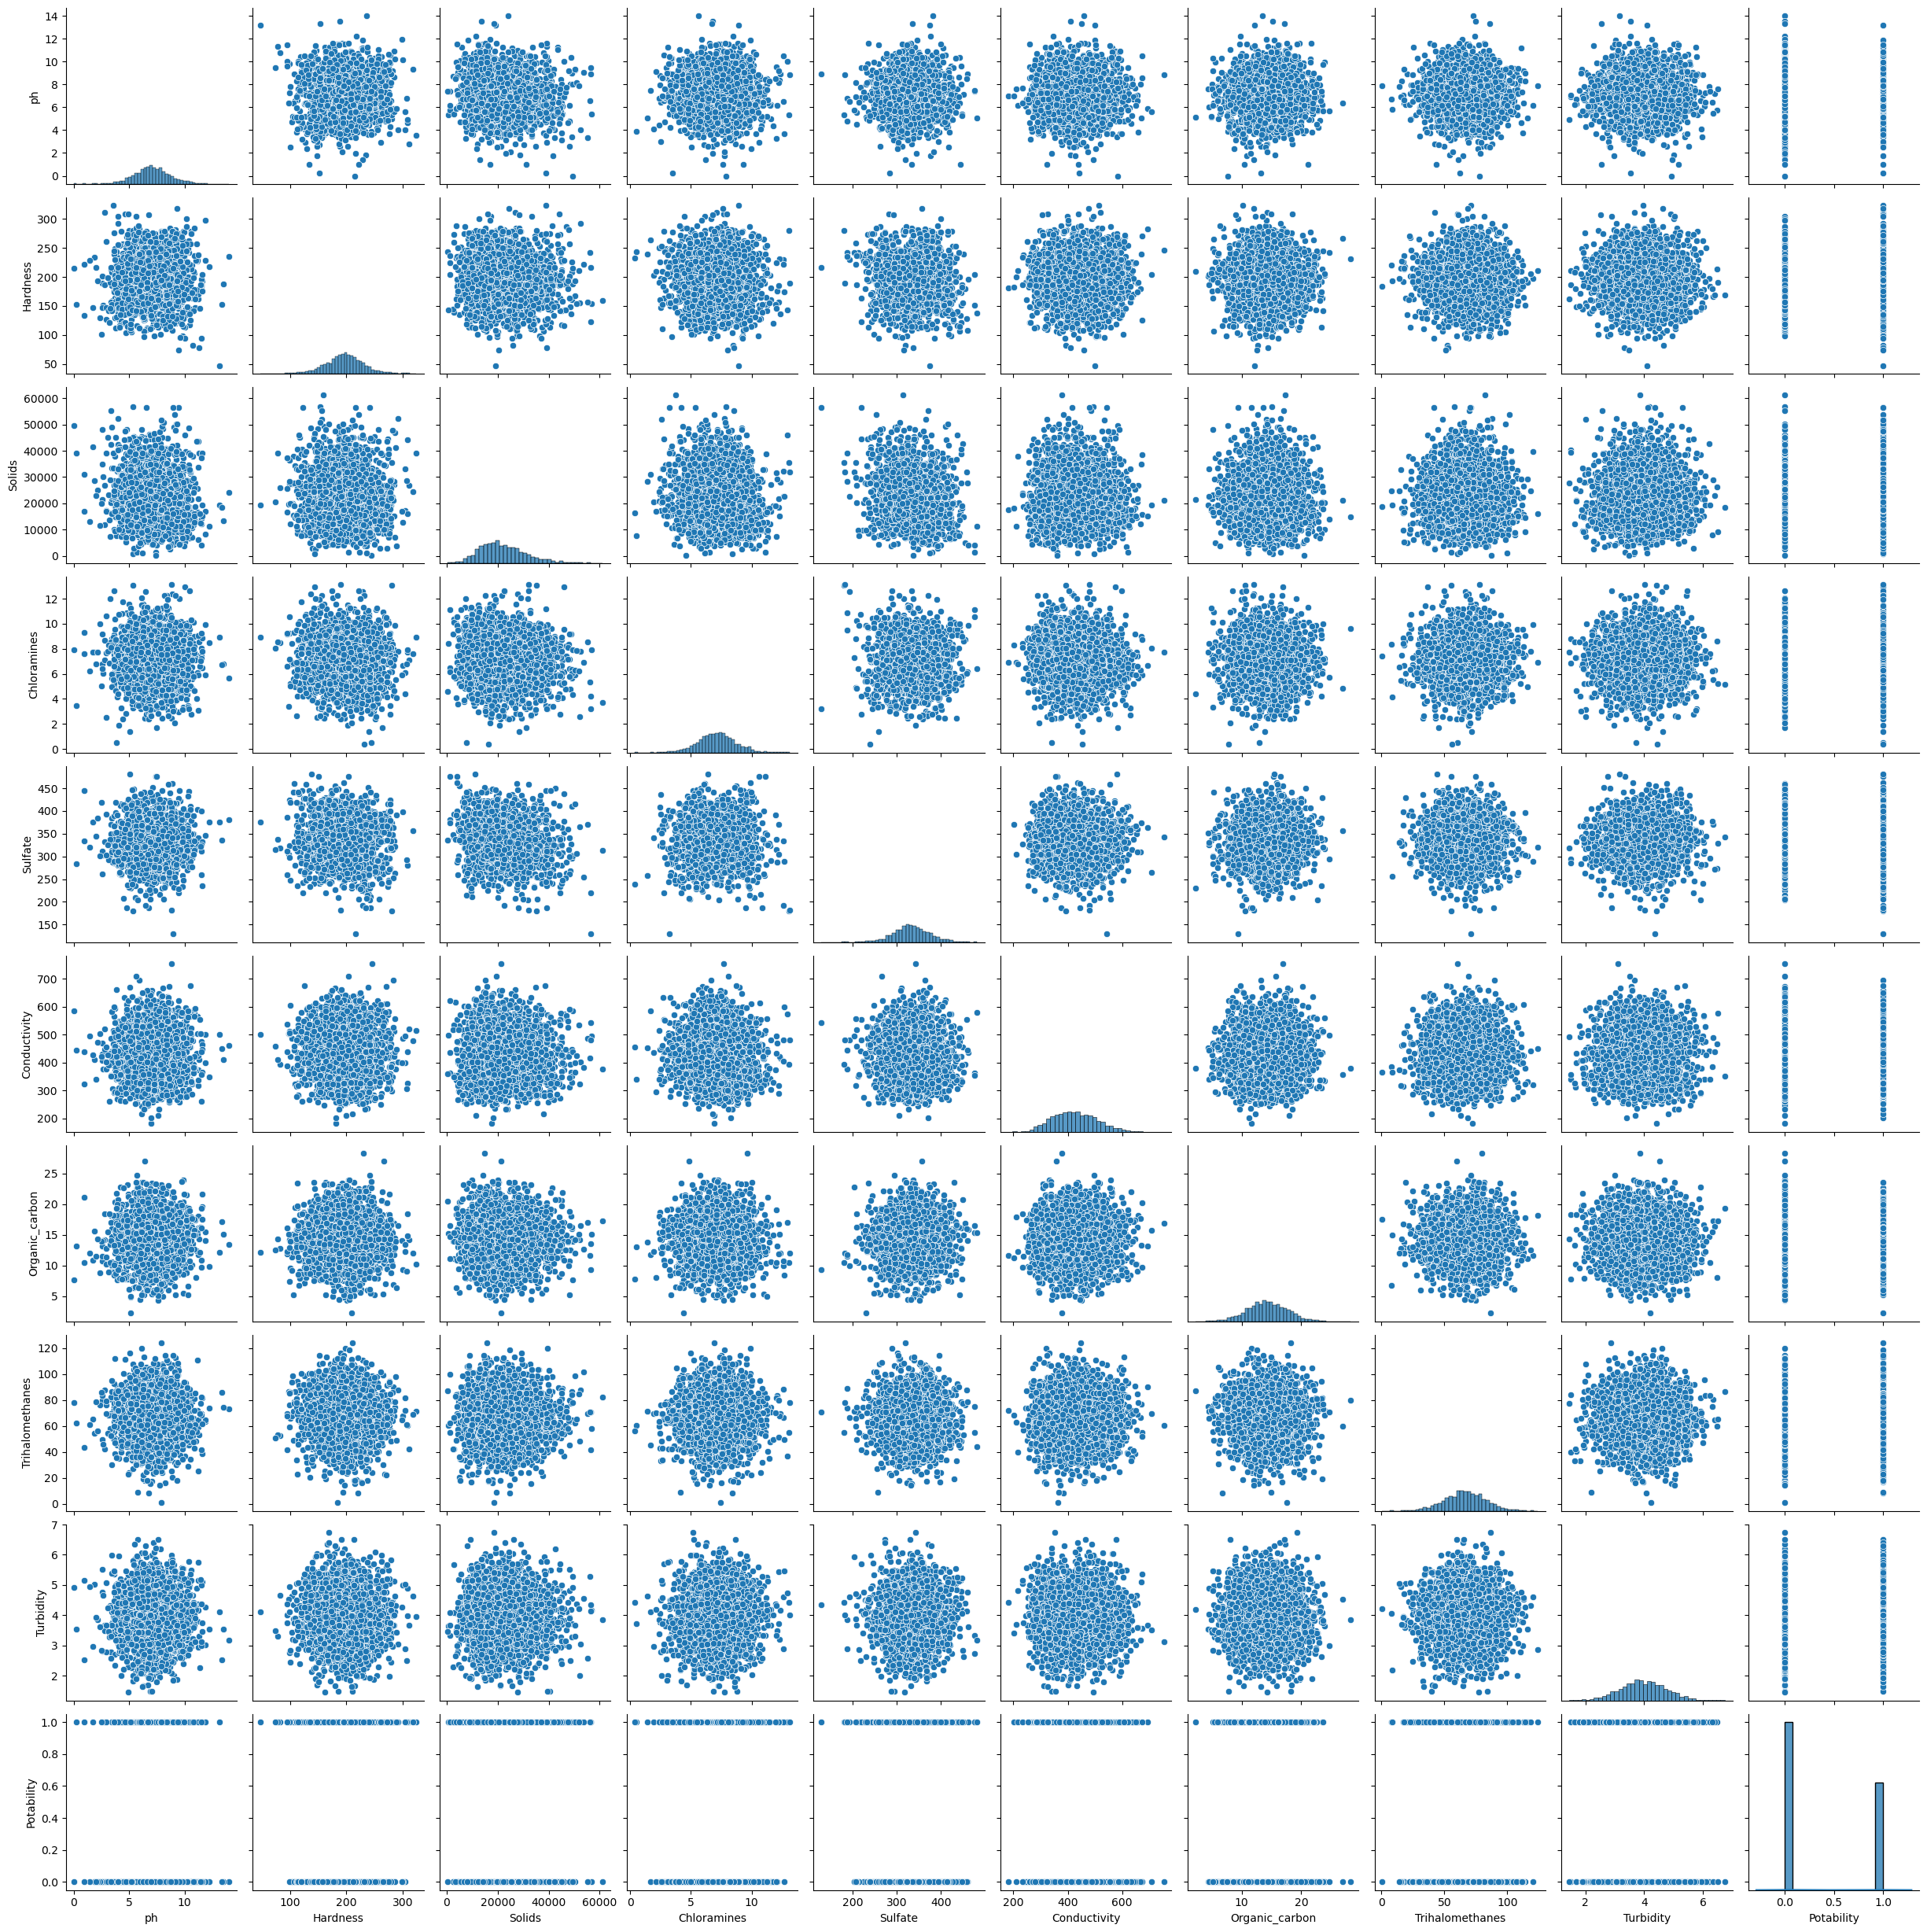

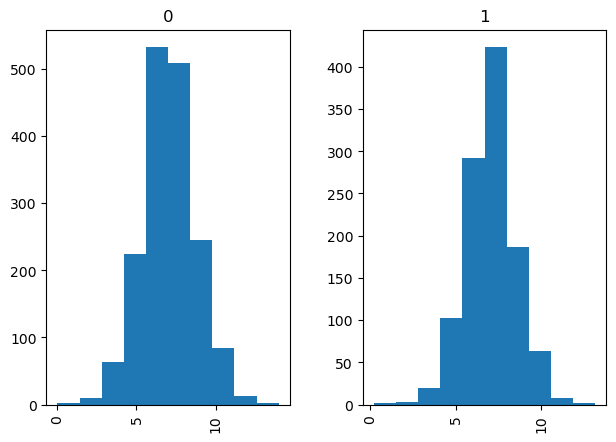

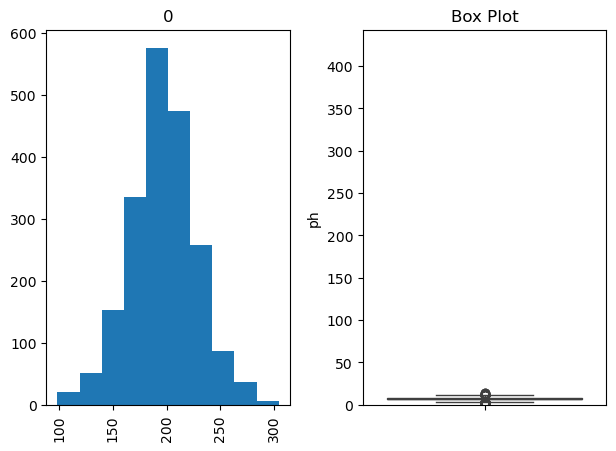

Solids             0.621634
Potability         0.450784
Conductivity       0.264490
ph                 0.025630
Organic_carbon     0.025533
Turbidity         -0.007817
Chloramines       -0.012098
Sulfate           -0.035947
Hardness          -0.039342
Trihalomethanes   -0.083031
dtype: float64

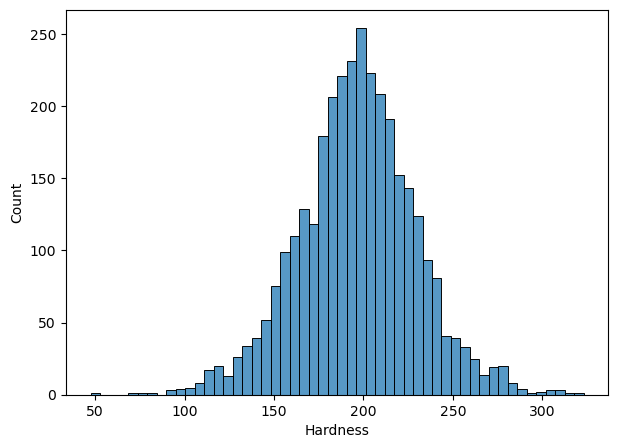

In [151]:
plt.figure(figsize=(5,3)) 
sns.heatmap(df.isnull()) 
plt.figure(figsize=(8,6)) 
sns.heatmap(df.corr(),annot=True) 
sns.countplot(x="Potability",data=df) 
df["Potability"].value_counts() 
sns.violinplot(x='Potability', y='ph', data=df, hue='Potability', palette='rocket', legend=False)
plt.rcParams['figure.figsize'] = [20,10] 
df.hist() 
plt.show() 
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10)) 
ax = ax.flatten() 
index=0 
for col,values in df.items(): 
 sns.boxplot(y=col,data=df,ax=ax[index]) 
 index=index+1 
sns.pairplot(df) 
plt.rcParams['figure.figsize'] = [7,5] 
sns.distplot(df['Potability']) 
df.hist(column='ph', by='Potability') 
df.hist(column='Hardness', by='Potability') 
def Box(df): 
 plt.title("Box Plot") 
 sns.boxplot(df) 
 plt.show() 
Box(df['ph']) 
sns.histplot(x = "Hardness", data=df) 
skew_val = df.skew().sort_values(ascending=False) 
skew_val 

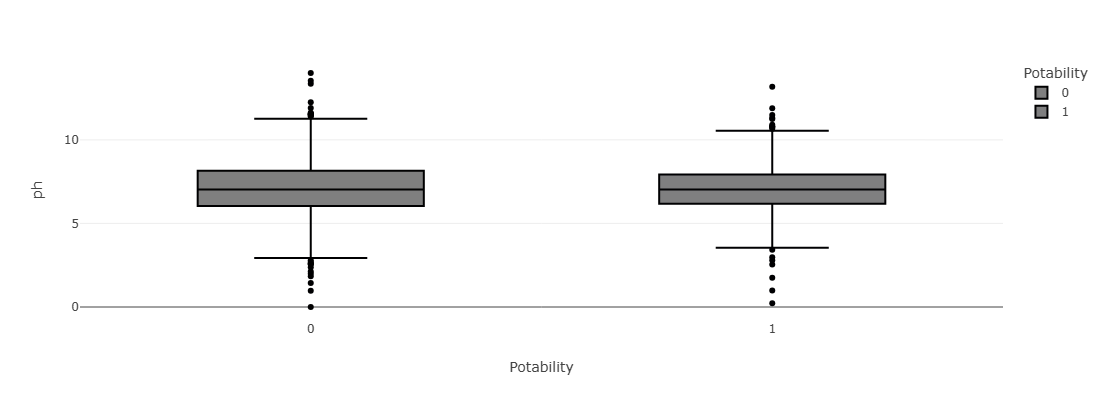

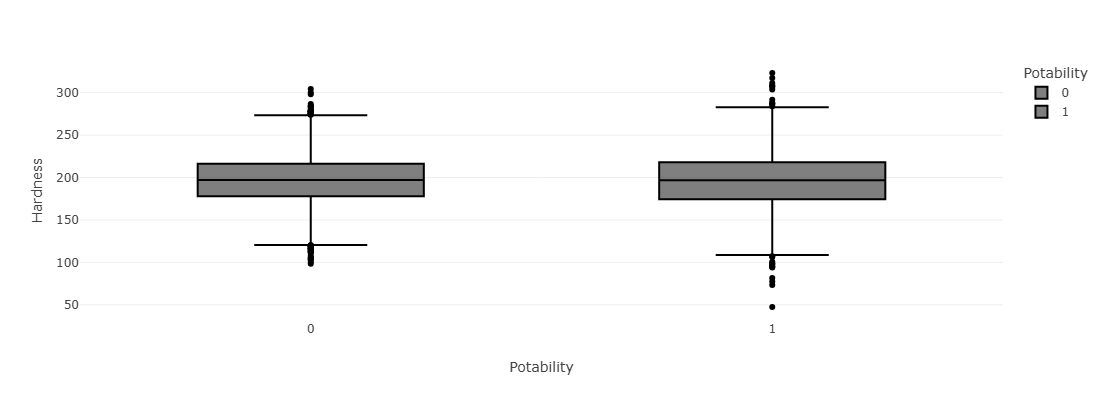

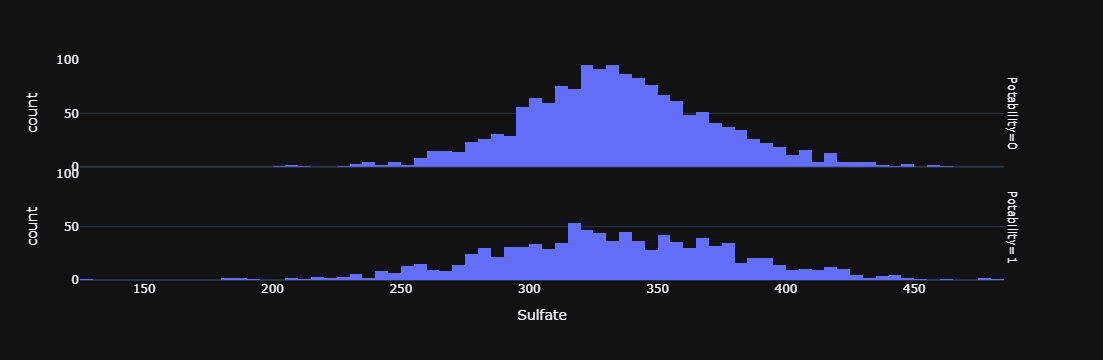

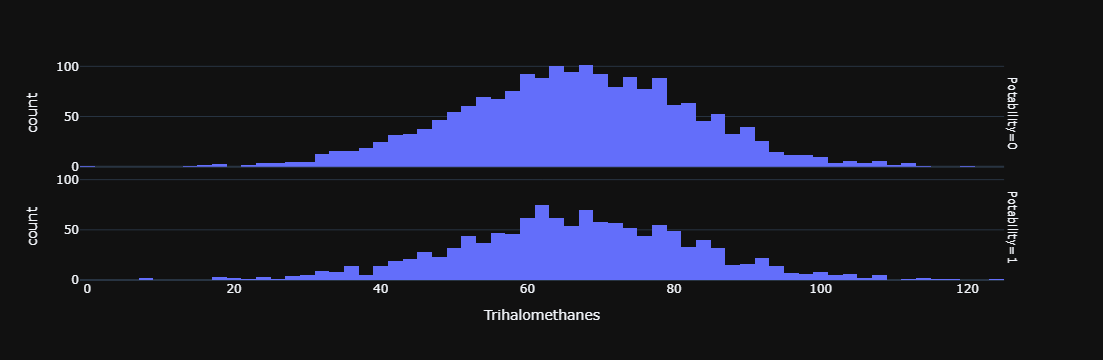

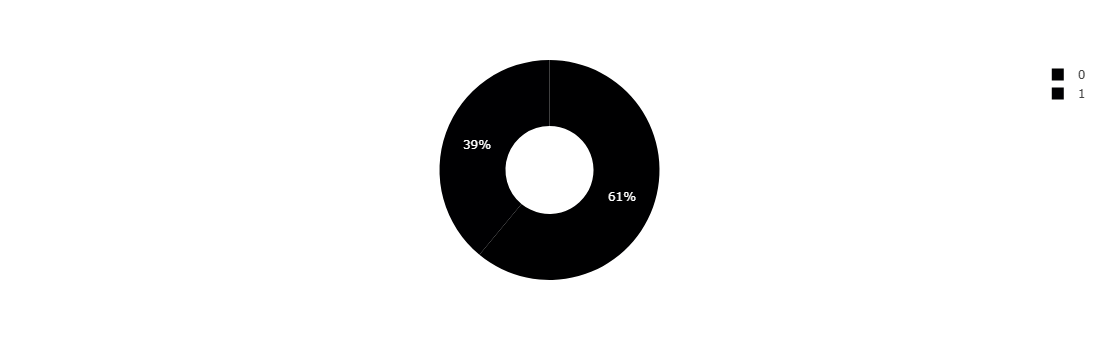

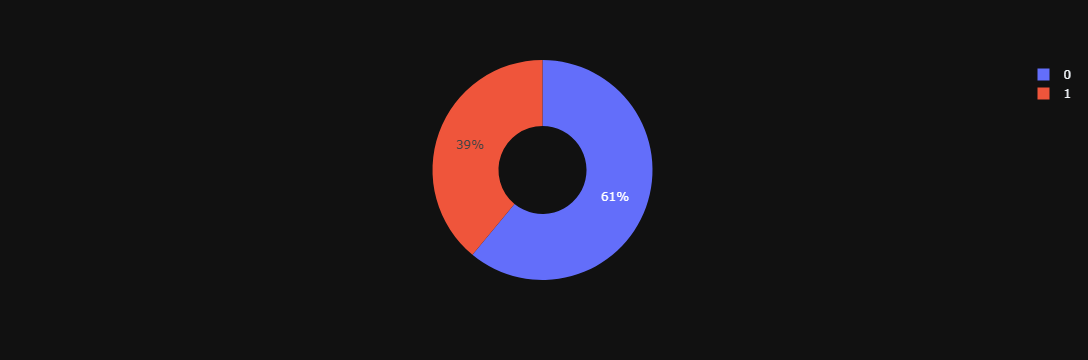

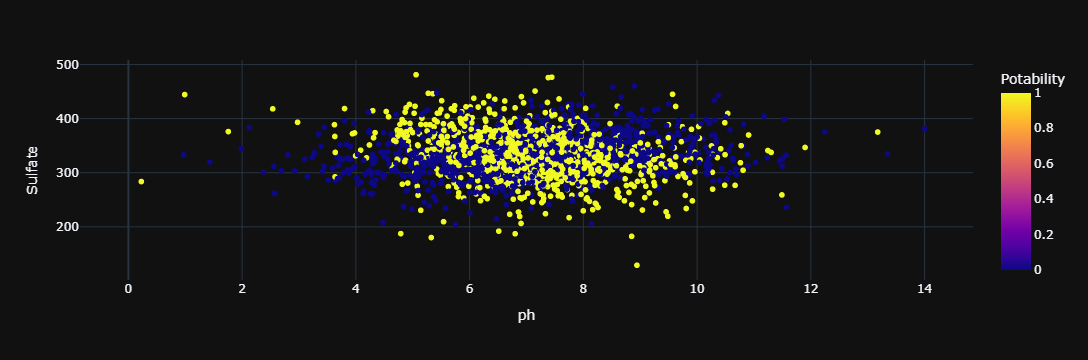

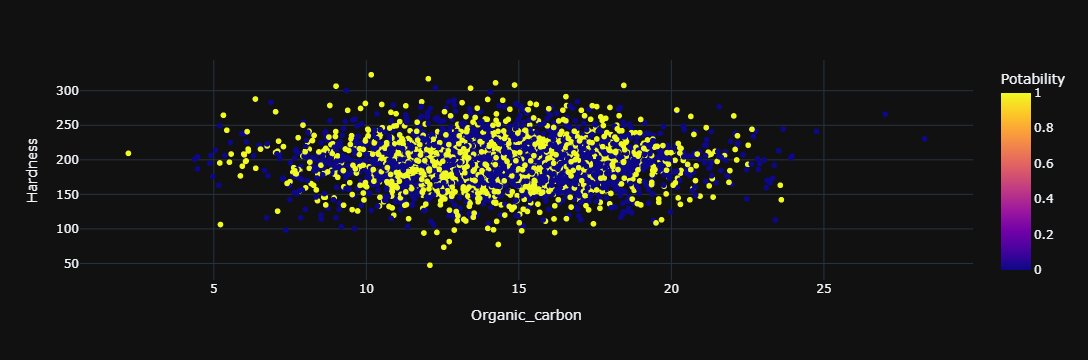

In [153]:
#Visualizing the Potability with Each Column 
fig = px.box(df, x="Potability", y="ph", color="Potability", width=800, height=400) 
fig.show() 
fig = px.box(df, x="Potability", y="Hardness", color="Potability", width=800, 
height=400) 
fig.show() 
fig = px.histogram (df, x = "Sulfate",  facet_row = "Potability",  template = 
'plotly_dark') 
fig.show () 
fig = px.histogram (df, x = "Trihalomethanes",  facet_row = "Potability",  template = 
'plotly_dark') 
fig.show () 
fig = px.pie(df,names = "Potability",hole=0.4) 
fig.show() 
fig = px.pie(df,names = "Potability",hole=0.4,template = "plotly_dark") 
fig.show() 
fig = px.scatter(df,x = "ph", y = "Sulfate", color= "Potability",template= 
"plotly_dark") 
fig.show() 
fig = px.scatter(df,x = "Organic_carbon", y = "Hardness", color= 
"Potability",template= "plotly_dark") 
fig.show()

<Axes: title={'center': 'Missing Data in Percentages'}>

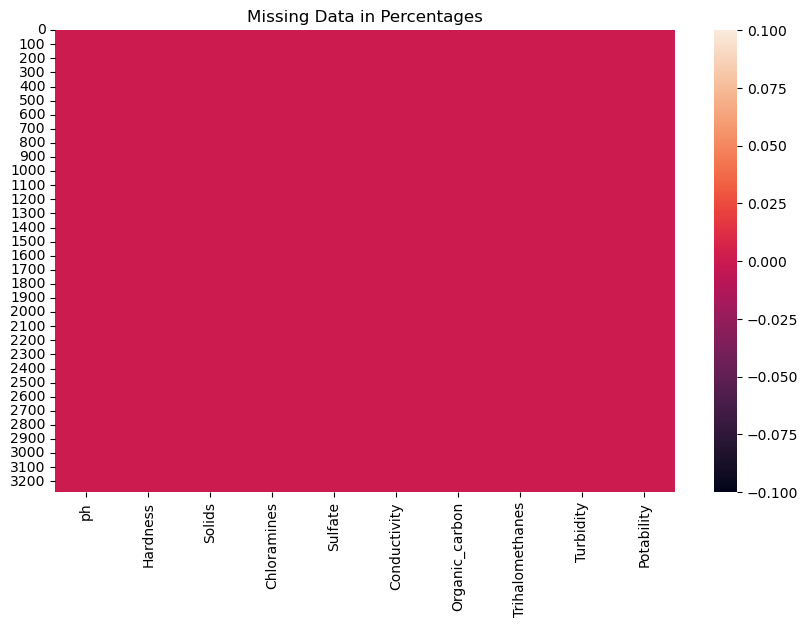

In [155]:
#Filing the Null Values 
df.isnull().mean().plot.bar(figsize = (12,8)) 
plt.ylabel('Percentage of missing values')  
plt.xlabel('Features')  
plt.title('Missing Data in Percentages'); 
df.isnull().mean().plot.bar(figsize = (10,6)) 
df["ph"]=df["ph"].fillna(df["ph"].mean()) 
df["Sulfate"]=df["Sulfate"].fillna(df["Sulfate"].mean()) 
df["Trihalomethanes"]=df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean()) 
df.isnull().sum() 
sns.heatmap(df.isnull())

In [157]:
#Data Preparation 
x = df.drop("Potability", axis=1) 
y = df["Potability"] 
x.shape , y.shape 
#StandardScaler 
scaler = StandardScaler() 
x = scaler.fit_transform(x)
x

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [159]:
#Training and Testing the Data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, 
random_state=42) 
x_train.shape , x_test.shape 

((2194, 9), (1082, 9))

In [163]:
# Import necessary libraries
from sklearn.metrics import f1_score, classification_report, accuracy_score

# Assuming y_test and pred_lr are already defined from your model predictions
# Example: y_test = true labels, pred_lr = predicted labels

# Print classification report
print(classification_report(y_test, pred_lr, zero_division=0))

# Calculate F1 Score
f1 = f1_score(y_test, pred_lr, average='binary')
print(f"\nF1 Score: {f1:.2f}")

# If you need to compute other metrics like ROC-AUC, accuracy, etc.
accuracy = accuracy_score(y_test, pred_lr)
print(f"\nAccuracy Score: {accuracy*100:.2f}%")



 

              precision    recall  f1-score   support

           0       0.65      0.52      0.58       680
           1       0.39      0.52      0.45       402

    accuracy                           0.52      1082
   macro avg       0.52      0.52      0.51      1082
weighted avg       0.55      0.52      0.53      1082


F1 Score: 0.45

Accuracy Score: 52.03%


              precision    recall  f1-score   support

           0       0.66      0.90      0.76       680
           1       0.56      0.22      0.32       402

    accuracy                           0.65      1082
   macro avg       0.61      0.56      0.54      1082
weighted avg       0.62      0.65      0.60      1082



array([[609,  71],
       [313,  89]], dtype=int64)

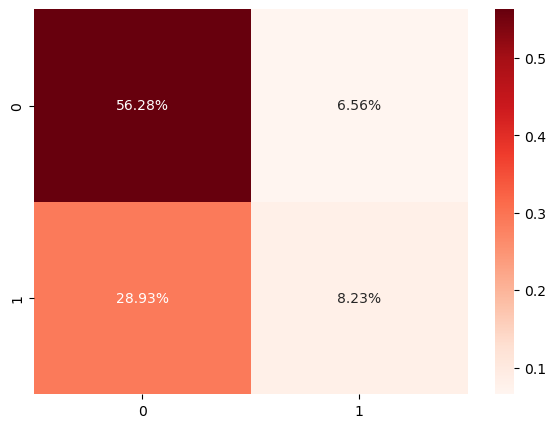

In [35]:
#Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier 
#creating the model object 
model_dt = DecisionTreeClassifier(max_depth=4, random_state=42) 
#Train the model 
model_dt.fit(x_train,y_train) 
#Making Prediction 
pred_dt = model_dt.predict(x_test) 
#accuracy Score 
accuracy_score_dt = accuracy_score(y_test,pred_dt) 
accuracy_score_dt*100 
print(classification_report(y_test,pred_dt)) 
#confusion Matrix 
cm2 = confusion_matrix(y_test,pred_dt) 
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds') 
cm2 

Random Forest Classifier Accuracy: 56.19%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.56      0.62       680
           1       0.43      0.57      0.49       402

    accuracy                           0.56      1082
   macro avg       0.56      0.56      0.55      1082
weighted avg       0.59      0.56      0.57      1082



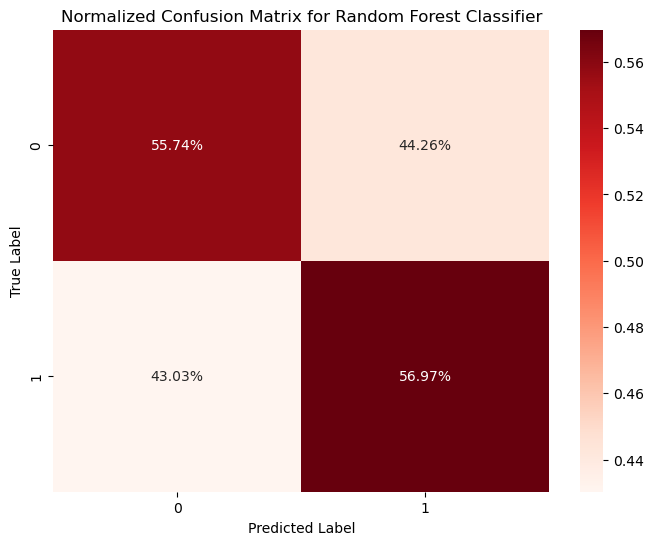


Confusion Matrix (Raw):
[[379 301]
 [173 229]]


In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize the RandomForestClassifier with class weights to handle class imbalance
model_rf = RandomForestClassifier(n_estimators=300, min_samples_leaf=0.16, random_state=42, class_weight='balanced')

# Train the Random Forest model
model_rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = model_rf.predict(x_test)

# Accuracy Score
accuracy_score_rf = accuracy_score(y_test, pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_score_rf * 100:.2f}%")

# Print the Classification Report (with zero_division handling)
print("\nClassification Report:")
print(classification_report(y_test, pred_rf, zero_division=0))

# Compute the confusion matrix
Cm3 = confusion_matrix(y_test, pred_rf)

# Normalize the confusion matrix for better visualization
Cm3_normalized = Cm3.astype('float') / Cm3.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Cm3_normalized, annot=True, fmt='0.2%', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Normalized Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optionally, print the raw confusion matrix
print("\nConfusion Matrix (Raw):")
print(Cm3)


              precision    recall  f1-score   support

           0       0.69      0.56      0.62       680
           1       0.43      0.57      0.49       402

    accuracy                           0.56      1082
   macro avg       0.56      0.56      0.55      1082
weighted avg       0.59      0.56      0.57      1082



array([[379, 301],
       [173, 229]], dtype=int64)

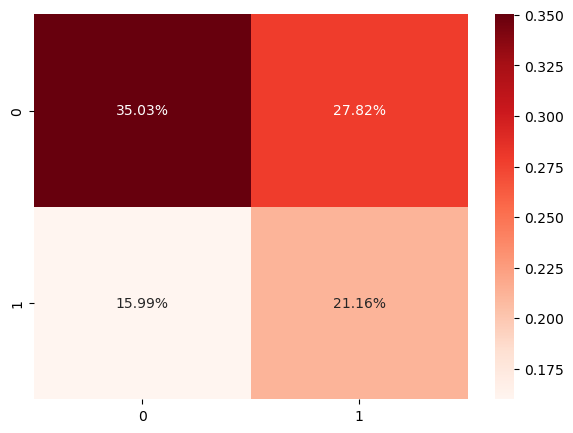

In [167]:
#K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier(n_neighbors=9, leaf_size=20) 
#Train the model 
model_knn.fit(x_train,y_train) 
#Making Prediction 
pred_knn = model_rf.predict(x_test) 
#accuracy Score 
accuracy_score_knn = accuracy_score(y_test,pred_knn) 
accuracy_score_knn*100 
#confusion Matrix 
print(classification_report(y_test,pred_knn)) 
cm4 = confusion_matrix(y_test,pred_knn) 
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds') 
cm4

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       680
           1       0.68      0.30      0.42       402

    accuracy                           0.69      1082
   macro avg       0.69      0.61      0.60      1082
weighted avg       0.69      0.69      0.65      1082



array([[623,  57],
       [280, 122]], dtype=int64)

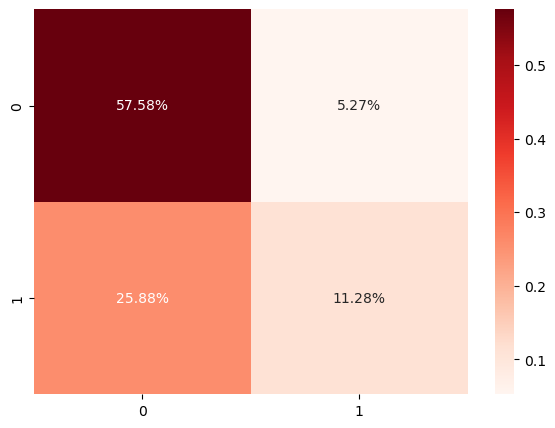

In [169]:
#Support Vector Machine 
from sklearn.svm import SVC 
model_svm = SVC(kernel="rbf", random_state = 42) 
model_svm.fit(x_train,y_train) 
#Making Prediction 
pred_svm = model_svm.predict(x_test) 
#accuracy Score 
accuracy_score_svm = accuracy_score(y_test,pred_svm) 
accuracy_score_svm*100 
#confusion Matrix 
print(classification_report(y_test,pred_svm)) 
cm5 = confusion_matrix(y_test, pred_svm) 
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds') 
cm5

AdaBoost Classifier Accuracy: 63.40%

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       680
           1       0.62      0.04      0.07       402

    accuracy                           0.63      1082
   macro avg       0.62      0.51      0.42      1082
weighted avg       0.63      0.63      0.51      1082



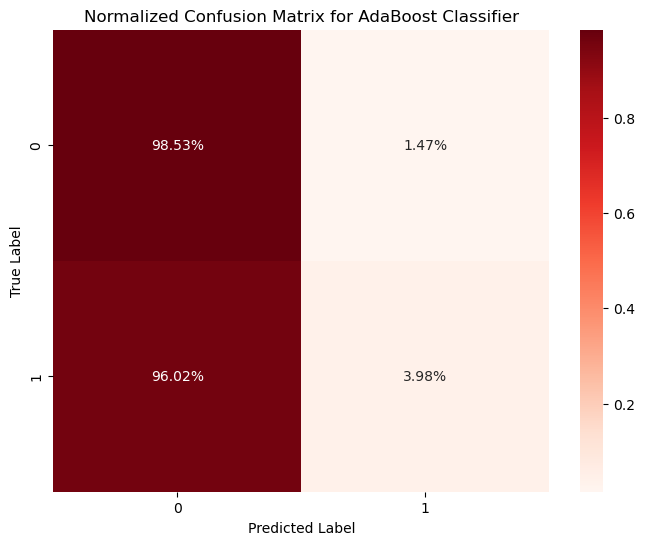


Confusion Matrix (Raw):
[[670  10]
 [386  16]]


In [171]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize AdaBoost with the SAMME algorithm (to avoid deprecation warning)
model_ab = AdaBoostClassifier(learning_rate=0.002, n_estimators=205, random_state=42, algorithm='SAMME')

# Train the model
model_ab.fit(x_train, y_train)

# Make predictions on the test set
pred_ab = model_ab.predict(x_test)

# Calculate accuracy
accuracy_score_ab = accuracy_score(y_test, pred_ab)
print(f"AdaBoost Classifier Accuracy: {accuracy_score_ab * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, pred_ab))

# Compute the confusion matrix
cm6 = confusion_matrix(y_test, pred_ab)

# Normalize the confusion matrix for better visualization
cm6_normalized = cm6.astype('float') / cm6.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm6_normalized, annot=True, fmt='0.2%', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Normalized Confusion Matrix for AdaBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optionally, print the raw confusion matrix
print("\nConfusion Matrix (Raw):")
print(cm6)


In [173]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


              precision    recall  f1-score   support

           0       0.68      0.89      0.77       680
           1       0.60      0.29      0.39       402

    accuracy                           0.67      1082
   macro avg       0.64      0.59      0.58      1082
weighted avg       0.65      0.67      0.63      1082



array([[603,  77],
       [285, 117]], dtype=int64)

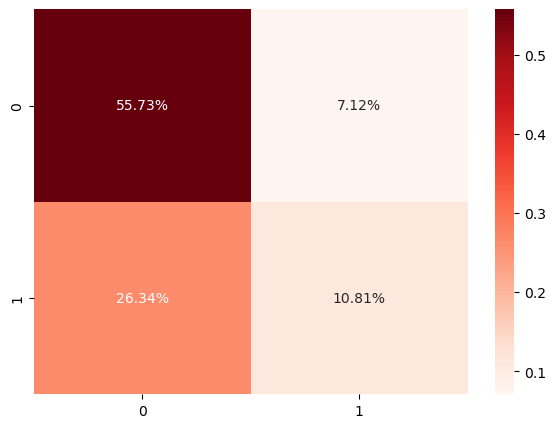

In [174]:
#XgBoost Classifier 
from xgboost import XGBClassifier 
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 0,  learning_rate= 0.03, n_jobs=5) 
#Train the model 
model_xgb.fit(x_train, y_train) 
#Making Prediction 
pred_xgb = model_xgb.predict(x_test) 
#accuracy Score 
accuracy_score_xgb = accuracy_score(y_test, pred_xgb) 
accuracy_score_xgb*100 
#confusion Matrix 
print(classification_report(y_test,pred_xgb)) 
cm7 = confusion_matrix(y_test, pred_xgb) 
sns.heatmap(cm7/np.sum(cm7), annot = True, fmt=  '0.2%', cmap = 'Reds') 
cm7 

Model  Accuracy_score
5                  SVM        0.688540
3              XGBoost        0.665434
1        Decision Tree        0.645102
6             AdaBoost        0.634011
2        Random Forest        0.561922
4          KNeighbours        0.561922
0  Logistic Regression        0.520333

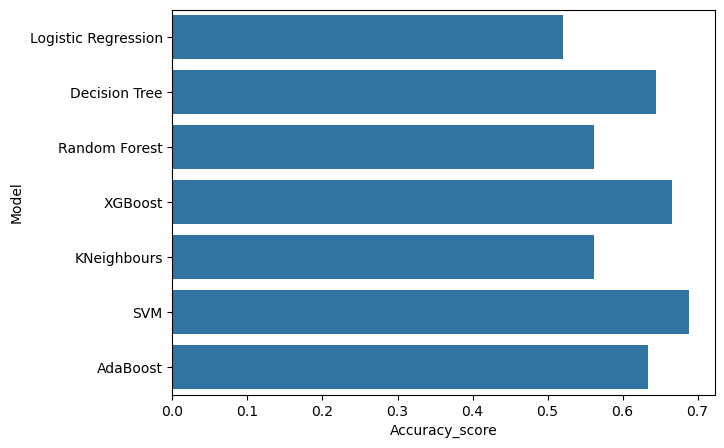

In [179]:
#Comparing the Accuracy of Algorithms 
models = pd.DataFrame({ 
'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 
'KNeighbours', 'SVM', 'AdaBoost'], 
'Accuracy_score' :[accuracy_score_lr, accuracy_score_dt, accuracy_score_rf, 
accuracy_score_xgb,  
accuracy_score_knn, accuracy_score_svm, accuracy_score_ab] 
}) 
models 
sns.barplot(x='Accuracy_score', y='Model', data=models) 
models.sort_values(by='Accuracy_score', ascending=False)

In [183]:
input_data =(9.042582866,221.3201844,14149.49983,5.325852715,366.6684085,377.8579586,13.00844311,87.89616571,4.34844014)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped =input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
prediction = model_svm.predict(std_data)
print(prediction)
if (prediction[0]==0):
 print("the water is not good")
else:
 print("the water is good")

[0]
the water is not good
